<a href="https://colab.research.google.com/github/deanzedd/Machine-Learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ví dụ trên python

In [ ]:
import numpy as np

Tạo hàm kích hoạt sigmoid

In [ ]:
def sigmoid(S):
  """
  S: an numpy array
  return sigmoid funct of each element of S
  """
  return 1/(1 + np.exp(-S))

thuật toán bằng SGD(sigmoid logistic reg with SGD)

kết hợp thêm weight decay

In [ ]:
def prob(w, X):
  """
  X: a 2d numpy array of shape (N, d), N data points, each with size d
  w: a 1d numpy array of shape (d)
  """
  return sigmoid(X.dot(w))

def Loss(w, X, y, lamda):
  """
  X, w as in prob
  y: a 1d numpy array of shape (N), each element 1 or 0
  """
  a = prob(w, X)
  loss = -np.mean(y*np.log(a) + (1-y)*np.log(1-a))
  weight_decay = 0.5*lamda*np.sum(w*w)/X.shape[0]
  return loss + weight_decay

In [ ]:
def logistic_regression(w_init, X, y, lamda, lr=0.1, nepochs = 2000):
  N, d = X.shape
  w = w_old = w_init
  # store history of loss in loss_hist
  loss_hist = [Loss(w, X, y, lamda)]
  ep = 0
  while ep < nepochs:
    ep +=1
    mix_ids = np.random.permutation(N) #for stochastic
    for i in mix_ids:
      Xi = X[i]
      yi = y[i]
      ai = sigmoid(Xi.dot(w))
      #update
      w = w - lr*((ai - yi)*Xi + lamda*w)
      loss_hist.append(Loss(w, X, y, lamda))
    if np.linalg.norm(w - w_old)<1e-3:
      print("done in "+str(ep))
      break
    w_old = w
  return w, loss_hist



In [ ]:
np.random.seed(3)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

#bias trick
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
lam = 0.0001
w, loss_hist = logistic_regression(w_init, Xbar, y, lam, lr=0.05, nepochs=5000)
print("Solution of Logistic Regression:", w)
print("Final loss:", Loss(w, Xbar, y, lam))

done in 364
Solution of Logistic Regression: [ 1.50744302 -4.09474562]
Final loss: 0.4015479935949766


ngưỡng quyết định có thể thay đổi

In [ ]:
def predict(w, X, threshold=0.5):
  """
  predict output for each row of X
  X: a numpy array of shape (N, d), threshold: 0 < threshold <1(ngưỡng quyết định)
  return a 1d numpy array, each element is 0 or 1
  """
  res = np.zeros(X.shape[0])
  res[np.where(prob(w, X) > threshold)[0]]=1
  return res

#Bài toán phân loại hai chữ số viết tay

Ta sẽ phân loại 0 và 1 bằng logis trên tập dữ liệu MNIST

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

mnist = fetch_openml('mnist_784', version =1, as_frame=False) #as_frame = False to ensure data is loaded as numpy array
N, d = mnist.data.shape

print("Total {:d} samples, each has {:d} pixels.".format(N, d))

Total 70000 samples, each has 784 pixels.


In [ ]:
X_all = mnist.data
y_all = mnist.target
X0 = X_all[np.where(y_all=='0')[0]] #all digit 0
X1 = X_all[np.where(y_all=='1')[0]] #all digit 1(the target variable y_all in the MNIST datasets is loaded as string)
y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.zeros(X0.shape[0]), np.ones(X1.shape[0])))
#split train and test
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=42)


In [ ]:
model = LogisticRegression(C=1e5, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))

0.9985
Accuracy 99.85 %


tìm những ảnh bị phân loại sai và hiển thị đúng

In [ ]:
from display_network import display_network
import matplotlib.pyplot as plt

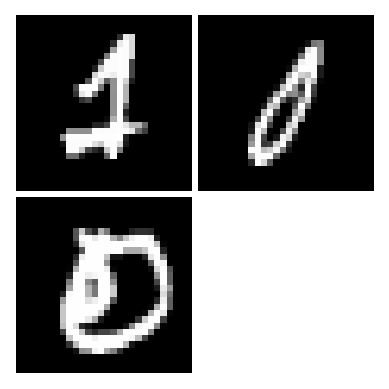

In [ ]:
mis = np.where((y_pred-y_test) !=0)[0]
Xmis = X_test[mis, :]
from display_network import *
plt.axis('off')
A = display_network(Xmis.T)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()


#multi-class classification

1. one-vs-one
  
  với C là số lượng nhãn thì ta xây dựng bộ phân loại nhị phân cho từng cặp dữ liệu -> P=C*(C-1)/2 bộ nhị phân -> tốn kém

2. phân loại theo tầng

  ý tưởng: ta nhóm 1 vài nhãn thành 1 tầng rồi sau đó có thể phân tầng hoặc phân loại nhị phân

  ưu điểm: giảm bộ phân tầng

  nhược điểm: nếu 1 điểm dữ liệu được phân loại sai từ 1 tầng nào đó thì 100% kq sai-> ko ai sd

3. mã hóa nhị phân

  ý tưởng: C nhãn thì ta sẽ tạo bộ phân loại có số bit là [log2(C)] = k

  ưu điểm: giảm bộ phân loại

  nhược điểm: 1 điểm dữ liệu phân loại đúng nếu nó đúng hết k bộ phân loại

4. one-vs-rest

  ý tưởng: C bộ phân loại nhị phân ứng với C nhãn, mỗi bộ xác định xem có phải nhãn của mình bằng xác suất

  Trong sklearn đã cài sẵn thuật toán trong logistic reg
